<IPython.core.display.Javascript object>


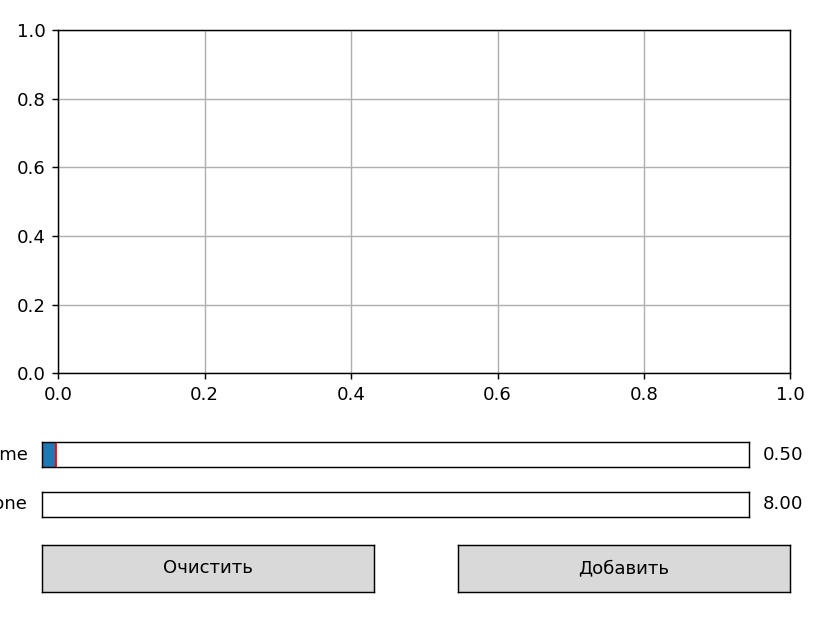

In [7]:
from scipy import *
from scipy.integrate import *
from pylab import *
import matplotlib.pyplot as plt 
%matplotlib notebook
import pylab
from numpy import *
# Импортируем класс кнопки и слайдера
from matplotlib.widgets import Button, Slider



def addPlot(graph_axes, sigma, mu):
    '''Добавить график к осям'''
    x = linspace(-mu, mu, 800)
    y = (1/sqrt(1+1j*x) * exp(-sigma**2/4/(1+1j*x))).real
    
    graph_axes.plot(x, y)

    # Нужно для обновления графика
    pylab.draw()


if __name__ == '__main__':
    def onButtonAddClicked(event):
        '''Обработчик события для кнопки "Добавить"'''
        # Будем использовать sigma и mu, установленные с помощью слайдеров
        global slider_sigma
        global slider_mu
        global graph_axes

        # Используем атрибут val, чтобы получить значение слайдеров
        addPlot(graph_axes, slider_sigma.val, slider_mu.val)

    def onButtonClearClicked(event):
        '''!!! Обработчик события нажатия кнопки "Очистить"'''
        global graph_axes

        graph_axes.clear()
        graph_axes.grid()
        pylab.draw()

    # Создадим окно с графиком
    fig, graph_axes = pylab.subplots()
    graph_axes.grid()

    # Оставим снизу от графика место для виджетов
    fig.subplots_adjust(left=0.07, right=0.95, top=0.95, bottom=0.4)

    # Создание кнопки "Добавить"
    axes_button_add = pylab.axes([0.55, 0.05, 0.4, 0.075])
    button_add = Button(axes_button_add, 'Добавить')
    button_add.on_clicked(onButtonAddClicked)

    # !!! Создание кнопки "Очистить"
    axes_button_clear = pylab.axes([0.05, 0.05, 0.4, 0.075])
    button_clear = Button(axes_button_clear, 'Очистить')
    button_clear.on_clicked(onButtonClearClicked)

    # Создание слайдера для задания sigma
    axes_slider_sigma = pylab.axes([0.05, 0.25, 0.85, 0.04])
    slider_sigma = Slider(axes_slider_sigma,
                          label='Time',
                          valmin=0,
                          valmax=25,
                          valinit=0.5,
                          valfmt='%1.2f')

    # Создание слайдера для задания mu
    axes_slider_mu = pylab.axes([0.05, 0.17, 0.85, 0.04])
    slider_mu = Slider(axes_slider_mu,
                       label='Diapazone',
                       valmin=8,
                       valmax=40,
                       valinit=0.0,
                       valfmt='%1.2f')

    pylab.show()